# Teleco Churn Prediction

![imglink](http://www.oxper.in/wp-content/uploads/2017/06/churn-1-900x444.png)


# <font color='red'> Introduction </font>

     Welcome to basic binary classification task
     this dataset want us to create model which can predict customer that will churn in future


In this kernel,

 - Simple Exploratory Data Analysis
 - Data wrangling
 - Creating predictive models
 - Fine tuning by GridSearch

## Import package

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams


%matplotlib inline

In [8]:
data = pd.read_csv('Churn.csv')

## Data Exploration

In [9]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
data.shape

(7043, 21)

    7043 data objects with 21 attributes

In [11]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**<font color='forestgreen'> Note</font>**

    First of all, drop customerID because it should not effect to churn probability

In [12]:
data.drop(['customerID'], axis=1, inplace=True)

## Target Feature

In [13]:
data['Churn'].value_counts(sort = False)

Yes    1869
No     5174
Name: Churn, dtype: int64

In [14]:
data['Churn'].value_counts(sort = False)

Yes    1869
No     5174
Name: Churn, dtype: int64

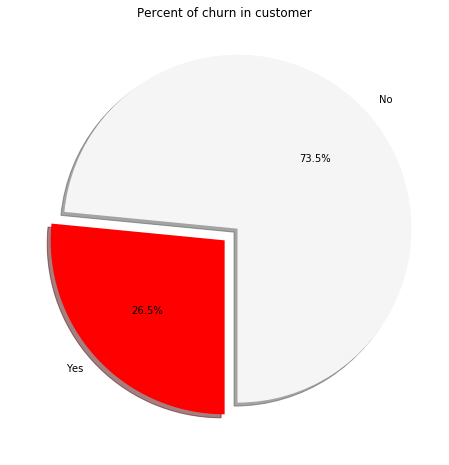

In [15]:
# Data to plot
labels =data['Churn'].value_counts(sort = True).index
sizes = data['Churn'].value_counts(sort = True)


colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()

**<font color='tomato'> Finding</font>**
    
    In training set, contain Churn customer only 26.5%

In [16]:
data['Churn'] = data['Churn'].map(lambda s :1  if s =='Yes' else 0)

## Data Wrangling

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [18]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Churn,0,0.0
TotalCharges,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0


**<font color='tomato'> Finding</font>**

    No missing data ??

In [19]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


**<font color='royalblue'> Preprocessing</font>**

#### Gender : Customer gender (female, male)

    Because we can't put string in model, then I decide to create new binary columns.

In [20]:
data['gender'].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

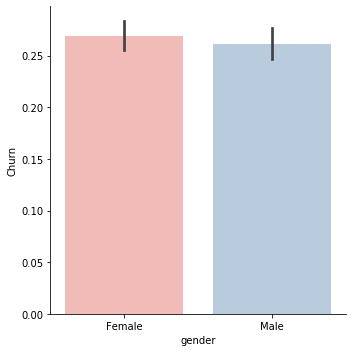

In [21]:
g = sns.factorplot(y="Churn",x="gender",data=data,kind="bar" ,palette = "Pastel1")


In [22]:
data = pd.get_dummies(data=data, columns=['gender'])

**<font color='royalblue'> Preprocessing</font>**

#### SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
    this feature is ready to use

In [23]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

**<font color='royalblue'> Preprocessing</font>**

#### Partner : Whether the customer has a partner or not (Yes, No)
    This feature value has the same meaning with SeniorCitizen 
    but it is a "Yes/No" values then we need to change format

In [24]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [25]:
data['Partner'] = data['Partner'].map(lambda s :1  if s =='Yes' else 0)
data['Partner'].value_counts()

0    3641
1    3402
Name: Partner, dtype: int64

**<font color='royalblue'> Preprocessing</font>**

#### Dependents, PhoneService, PaperlessBilling
    Do the same what we do in "Partner" column
    

In [26]:
data['Dependents'] = data['Dependents'].map(lambda s :1  if s =='Yes' else 0)
data['PhoneService'] = data['PhoneService'].map(lambda s :1  if s =='Yes' else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)


**<font color='royalblue'> Preprocessing</font>**

#### Tenure : Number of months the customer has stayed with the company
    This is numerical feature we can cut it to bin width but I think it ready to use  
    

In [27]:
data['tenure'].head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

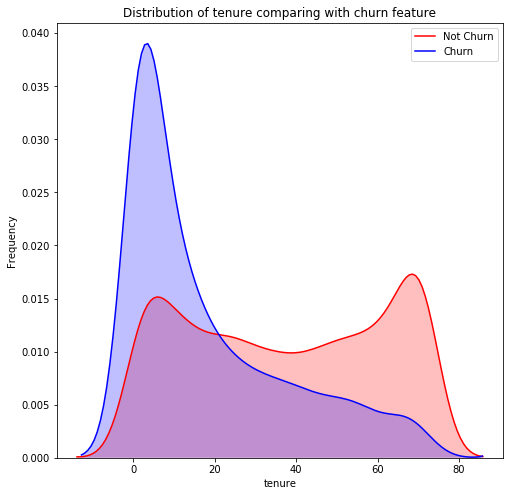

In [28]:
# tenure distibution 
g = sns.kdeplot(data.tenure[(data["Churn"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(data.tenure[(data["Churn"] == 1) ], ax =g, color="Blue", shade= True)
g.set_xlabel("tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

**<font color='tomato'> Finding</font>**

    Seem like most of churn customer stayed in company less than 20 months
    and customer with high value in tenure has low probability to churn

**<font color='royalblue'> Preprocessing</font>**

#### MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
    look like Yes No feature but it contain 3 values. 
    I should create new column that can tell model this customer has phone service or not.
    but we already have 'PhoneService' columns, 
    then I decide to assume that "No phone service" has the same meaning with "No"
    

In [29]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [30]:
data['MultipleLines'].replace('No phone service','No', inplace=True)
data['MultipleLines'] = data['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)
data['MultipleLines'].value_counts()

0    4072
1    2971
Name: MultipleLines, dtype: int64

**<font color='royalblue'> Preprocessing</font>**

#### InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
    First of all, I want something like "PhoneService" column, 
    then I decide to create Has_InternetService column which can tell this customer has internet service or not.
    Next, if they have internet service we need to tell model what kind of service

In [31]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [32]:
data['Has_InternetService'] = data['InternetService'].map(lambda s :0  if s =='No' else 1)
data['Fiber_optic'] = data['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
data['DSL'] = data['InternetService'].map(lambda s :1  if s =='DSL' else 0)


In [33]:
print(data['Has_InternetService'].value_counts())
print(data['Fiber_optic'].value_counts())
print(data['DSL'].value_counts())
data.drop(['InternetService'], axis=1, inplace=True)

1    5517
0    1526
Name: Has_InternetService, dtype: int64
0    3947
1    3096
Name: Fiber_optic, dtype: int64
0    4622
1    2421
Name: DSL, dtype: int64


**<font color='royalblue'> Preprocessing</font>**

**OnlineSecurity OnlineBackup DeviceProtection <br>
 TechSupport StreamingTV StreamingMovies**

     All of these columns have the same format,I do the samething what I do in "MultipleLines" column

In [34]:
data['OnlineSecurity'] = data['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)
data['OnlineBackup'] = data['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)
data['DeviceProtection'] = data['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)
data['TechSupport'] = data['TechSupport'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingTV'] = data['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingMovies'] = data['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)

**<font color='royalblue'> Preprocessing</font>**

#### PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    This is categorical feature, I will use pandas function "get_dummies" for this feature

In [35]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [36]:
data = pd.get_dummies(data=data, columns=['PaymentMethod'])

**<font color='forestgreen'> Note</font>**

    What we got from get_dummies ??

In [37]:
data[['PaymentMethod_Electronic check',
      'PaymentMethod_Mailed check',
      'PaymentMethod_Bank transfer (automatic)',
      'PaymentMethod_Credit card (automatic)']].head()

,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0


**<font color='royalblue'> Preprocessing</font>**

#### Contract : The contract term of the customer (Month-to-month, One year, Two year)
    this is also categorical value, let "get_dummies" it


In [38]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [39]:
data = pd.get_dummies(data=data, columns=['Contract'])

**<font color='royalblue'> Preprocessing</font>**

#### MonthlyCharges : The amount charged to the customer monthly
    numerical features and lucky!! it ready to use

In [40]:
data['MonthlyCharges'].head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64

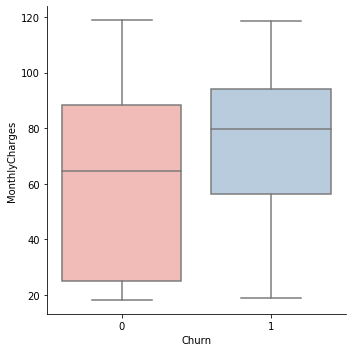

In [41]:
g = sns.factorplot(x="Churn", y = "MonthlyCharges",data = data, kind="box", palette = "Pastel1")

**<font color='tomato'> Finding</font>**

    According to above plot, High MonthlyCharges may affect to churn probability.
    And seem like customer will not churn if they have low amount in MonthlyCharges

**<font color='royalblue'> Preprocessing</font>**

#### TotalCharges : The total amount charged to the customer
    numerical feature !?, but now it still in object type.
    we need to fix it.

In [42]:
data['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [43]:
## because 11 rows contain " " , it means 11 missing data in our dataset
len(data[data['TotalCharges'] == " "])

11

In [44]:
## Drop missing data
data = data[data['TotalCharges'] != " "]

In [45]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
## At first time I use this command but it error because some value contain " "
## That why I know " " hide in our dataset 

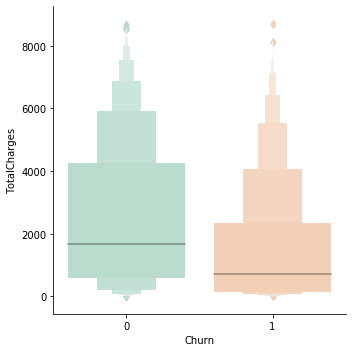

In [46]:
g = sns.factorplot(y="TotalCharges",x="Churn",data=data,kind="boxen", palette = "Pastel2")

**<font color='tomato'> Finding</font>**

    From boxen plot, most of churn customer has less than 2000 in total chrage.
    In range of 2500 to 8000, population of loyalty customer is around twice as amount as churn customer.

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PhoneService                             7032 non-null   int64  
 5   MultipleLines                            7032 non-null   int64  
 6   OnlineSecurity                           7032 non-null   int64  
 7   OnlineBackup                             7032 non-null   int64  
 8   DeviceProtection                         7032 non-null   int64  
 9   TechSupport                              7032 non-null   int64  
 10  StreamingTV                              7032 no

##  CreatingModel & Evaluate

      In this step, I will use model with default parameter compare with tuning parameter by using grid search
      Gridsearch is just like try to put all possible combining between parameter in ranges that we input.
      It consume a lot of time, I decide to comment some line. you can try uncomment it when run in your local PC.

In [48]:
data["Churn"] = data["Churn"].astype(int)

Y_train = data["Churn"]
X_train = data.drop(labels = ["Churn"],axis = 1)

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

Rfclf = RandomForestClassifier(random_state=15)
Rfclf.fit(X_train, Y_train)

RandomForestClassifier(random_state=15)

In [50]:
# 10 Folds Cross Validation 
clf_score = cross_val_score(Rfclf, X_train, Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79829545 0.80539773 0.79374111 0.79516358 0.77809388 0.74964438
 0.80938834 0.79374111 0.80227596 0.80227596]


0.7928017506142506

**<font color='tomato'> Finding</font>**

    My default random forest get around 78% accuracy from cross-validation

In [51]:
%%time
param_grid  = { 
                'n_estimators' : [500,1200],
               # 'min_samples_split': [2,5,10,15,100],
               # 'min_samples_leaf': [1,2,5,10],
                'max_depth': range(1,5,2),
                'max_features' : ('log2', 'sqrt'),
                'class_weight':[{1: w} for w in [1,1.5]]
              }

GridRF = GridSearchCV(RandomForestClassifier(random_state=15), param_grid)

GridRF.fit(X_train, Y_train)
#RF_preds = GridRF.predict_proba(X_test)[:, 1]
#RF_performance = roc_auc_score(Y_test, RF_preds)

print(
    #'DecisionTree: Area under the ROC curve = {}'.format(RF_performance)
     "\nBest parameters \n" + str(GridRF.best_params_))


Best parameters 
{'class_weight': {1: 1.5}, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 500}
CPU times: user 3min 48s, sys: 810 ms, total: 3min 49s
Wall time: 3min 51s


In [52]:
rf = RandomForestClassifier(random_state=15,**GridRF.best_params_)
rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight={1: 1.5}, max_depth=3, max_features='log2',
                       n_estimators=500, random_state=15)

## K-Fold CV with accuracy metric


In [53]:
# 10 Folds Cross Validation 
clf_score = cross_val_score(rf, X_train, Y_train, cv=10)
print(clf_score)
clf_score.mean()
    

[0.79971591 0.81676136 0.80654339 0.81507824 0.78093883 0.79658606
 0.81365576 0.79658606 0.79089616 0.80369844]


0.8020460203025992

**<font color='tomato'> Finding</font>**

    My grid-search random forest get around 80% accuracy from cross-validation,
    a little bit improve from default parameter

## Feature importances
    another advantage from rule-based model

In [54]:
Rfclf_fea = pd.DataFrame(rf.feature_importances_)
Rfclf_fea["Feature"] = list(X_train) 
Rfclf_fea.sort_values(by=0, ascending=False).head()

,0,Feature
24,0.212571,Contract_Month-to-month
3,0.157862,tenure
26,0.119943,Contract_Two year
18,0.103963,Fiber_optic
22,0.079805,PaymentMethod_Electronic check


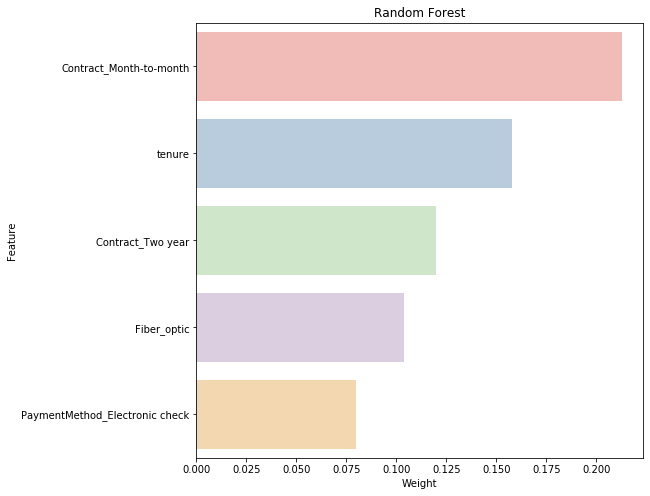

In [55]:
g = sns.barplot(0,"Feature",data = Rfclf_fea.sort_values(by=0, ascending=False)[0:5], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Random Forest")

## Confusion Matrix

    also known as an error matrix, it is a specific table layout that allows visualization of the performance of an algorithm

In [56]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_train)

print(confusion_matrix(Y_train, y_pred))

[[4638  525]
 [ 848 1021]]


In [57]:
from sklearn.metrics import classification_report

print(classification_report( Y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5163
           1       0.66      0.55      0.60      1869

    accuracy                           0.80      7032
   macro avg       0.75      0.72      0.73      7032
weighted avg       0.80      0.80      0.80      7032



**Thank you for reading until the end : )** 

    I will try to update new version
    please vote or comment If you like it ^_^
    If you have any suggestion let me know in comment.